Image Preprocessing

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [31]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [32]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/ibm/Dataset/training_set",target_size=(64,64),class_mode="categorical",batch_size=30)

Found 5630 images belonging to 9 classes.


In [34]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/ibm/Dataset/test_set",target_size=(64,64),class_mode="categorical",batch_size=30)

Found 2243 images belonging to 9 classes.


Model Building

In [35]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [36]:
model=Sequential()

In [37]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [38]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [39]:
model.add(Flatten())

In [40]:
model.add(Dense(200,activation='relu'))
model.add(Dense(9,activation="softmax"))

In [41]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [42]:
len(x_train)

188

In [43]:
len(x_test)

75

In [44]:
model.fit(x_train,epochs=10,validation_data=x_test,steps_per_epoch=len(x_train)//10,validation_steps=len(x_test))

Epoch 1/10
18/18 [==============================] - 37s 2s/step - loss: 1.5536 - accuracy: 0.6226 - val_loss: 9.1951 - val_accuracy: 0.4102
Epoch 2/10
18/18 [==============================] - 36s 2s/step - loss: 0.2921 - accuracy: 0.8981 - val_loss: 8.0715 - val_accuracy: 0.4414
Epoch 3/10
18/18 [==============================] - 28s 2s/step - loss: 0.1301 - accuracy: 0.9685 - val_loss: 8.5431 - val_accuracy: 0.4356
Epoch 4/10
18/18 [==============================] - 31s 2s/step - loss: 0.0937 - accuracy: 0.9759 - val_loss: 9.2675 - val_accuracy: 0.4191
Epoch 5/10
18/18 [==============================] - 28s 2s/step - loss: 0.0638 - accuracy: 0.9870 - val_loss: 10.3266 - val_accuracy: 0.4079
Epoch 6/10
18/18 [==============================] - 26s 1s/step - loss: 0.0383 - accuracy: 0.9926 - val_loss: 10.4123 - val_accuracy: 0.4391
Epoch 7/10
18/18 [==============================] - 24s 1s/step - loss: 0.0171 - accuracy: 0.9981 - val_loss: 10.8849 - val_accuracy: 0.4391
Epoch 8/10
18/18 

In [45]:
model.save("aslpng.h5")

In [46]:
!tar -zcvf real-time-communication.tgz aslpng.h5

aslpng.h5


In [47]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 26.9 MB/s 
     |████████████████████████████████| 132 kB 76.0 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 79 kB 9.9 MB/s 
     |████████████████████████████████| 9.9 MB 66.6 MB/s 
     |████████████████████████████████| 140 kB 56.0 MB/s 
     |████████████████████████████████| 956 kB 85.1 MB/s 
     |████████████████████████████████| 135 kB 84.9 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=ac52bbcaa406f9df0032c37c53be4bac28fb55754a964b5b17ae18faea5f1971
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=d19fbbebab

In [48]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 38.2 MB/s 
     |████████████████████████████████| 51 kB 881 kB/s 
     |████████████████████████████████| 824 kB 63.5 MB/s 
     |████████████████████████████████| 133 kB 58.9 MB/s 
     |████████████████████████████████| 547 kB 56.6 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=1c1e5a58a70c9250e544f76d040f550b39ab0e62cbf9f0f53e47181b8fb31dfc
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=15d0a4300a013fe0055f0ab6949796db7951e6e49d465dd2988a760776a8e729
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos

In [49]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://eu-de.ml.cloud.ibm.com",
    "apikey": "1-XN7Vn3RnrLhFOJdL5fZhv6nYwqHNPb3OAwA0KkZlk9"
}

client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [50]:
client

In [51]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-de:a/b9331efaedac4670a69900b9b86e4341:150d8bd2-b3df-4636-848a-d80f4b26fcd1::',
      'guid': '150d8bd2-b3df-4636-848a-d80f4b26fcd1',
      'name': 'Watson Machine Learning-kn',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Real Time Communication Powered by AI for Specially Abled',
    'scope': {'bss_account_id': 'b9331efaedac4670a69900b9b86e4341'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '9f4f8465-6521-43e6-8b63-713a7c5aa38e',
      'bucket_region': 'eu-de-standard',
      'credentials': {'admin': {'access_key_id': '9666c3ab19204db3a12c6cd40a19070b',
        'api_key': 'oPwhc0Hel875UHla8P8VsENtzBUS_APw3k8K3OQshISm',
        'secret_access_key': '681fe49d3fa45404ff41cb2f361afe50ddae9ae4ac3e5e31',
        'service_id': 'ServiceId-61c87d99-7dfc-491e-bdef-72cf589cac2e'},
       'editor': {'access_key_id': '890

In [52]:
space_uid="cff76553-4fb2-400c-9341-d2e9ac10faee"

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model = load_model('aslpng.h5')

In [55]:
client.set.default_space(space_uid)

'SUCCESS'

In [56]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [57]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [58]:
model_details = client.repository.store_model(model='real-time-communication.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7"})
model_id = client.repository.get_model_id(model_details)

In [59]:
model_id

'3415568f-6c90-4550-b7df-b70a523220b0'

In [60]:
client.repository.download(model_id,'real-time-communication-system.tgz')

Successfully saved model content to file: 'real-time-communication-system.tgz'


'/content/real-time-communication-system.tgz'

TESTING


In [61]:
from keras.models import load_model
import numpy as np
import cv2

In [62]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

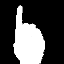

In [64]:
model=load_model("aslpng.h5")
img = image.load_img(r"/content/drive/MyDrive/ibm/Dataset/test_set/D/10.png",target_size=(64,64))
img

In [65]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [66]:
x.shape

(64, 64, 3)

In [67]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [68]:
pred = model.predict(x)

1/1 [==============================] - 0s 50ms/step


In [69]:
pred

array([[0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [70]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred.argmax(axis=1)[0]
pred_id

3

In [71]:
print("the alphabet is ",str(class_name[pred_id]))

the alphabet is  D
